<a href="https://colab.research.google.com/github/Yanaput/EGCI463-pattern-recognition-project/blob/main/nsynth_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://huggingface.co/datasets/TwinkStart/Nsynth

In [10]:
import numpy as np
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pip install keras tensorflow scikeras scikit-learn

# Load dataset

In [12]:
from google.colab import userdata
projPath  = userdata.get('driveProjDir') #replace this with your csv path

In [17]:
features_label = pd.read_csv(f"/content/drive/MyDrive/{projPath}/features_label.csv")
features_label

,0,1,2,3,4,5,6,7,8,9,...,12023,12024,12025,12026,12027,12028,12029,12030,12031,instrument_family
0,-53.803909,-57.194024,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,-80.000000,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,3
1,-41.581627,-41.147030,-50.666237,-64.943981,-60.756839,-60.464744,-60.993004,-63.912845,-61.711862,-62.382845,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,6
2,-16.751124,-14.606224,-14.500415,-14.003709,-14.280511,-14.614283,-15.854235,-16.143106,-17.500415,-20.172544,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-74.445993,0
3,-2.217868,0.000000,-2.265561,-4.262692,-5.280903,-6.297461,-7.342139,-8.409485,-9.516589,-10.664447,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4,-39.486546,-30.101491,-29.918419,-34.714702,-49.770357,-55.999469,-55.860402,-53.477410,-59.263462,-60.489511,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,-22.894519,-21.310778,-27.454087,-33.497683,-33.068524,-32.833817,-32.720519,-32.592567,-32.394799,-32.219643,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,4
4092,-50.416488,-42.023727,-39.495096,-41.555525,-51.454520,-54.918152,-60.328524,-69.375597,-73.076184,-73.600458,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,0
4093,-22.917634,-27.114879,-52.179479,-67.841889,-68.402644,-65.043253,-62.685682,-72.406796,-67.885038,-63.723752,...,-80.0,-80.0,-80.0,-80.00000,-80.0,-80.0,-80.0,-80.0,-80.000000,5
4094,-68.290314,-59.045592,-54.324949,-57.203160,-57.954304,-56.753415,-57.259861,-60.041177,-60.289779,-60.373389,...,-80.0,-80.0,-80.0,-78.91858,-80.0,-80.0,-80.0,-80.0,-63.326588,9


In [18]:
class_list = ['guitar',
 'organ',
 'bass',
 'keyboard',
 'reed',
 'string',
 'mallet',
 'flute',
 'brass',
 'vocal'
]

# Deeplearning model


In [13]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(features_label.iloc[:, :-1], features_label.iloc[:,-1], test_size=0.2, random_state=3213123)

In [14]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [20]:
# covert back into (number of train/test), height, width, channels(greyscale) for CNN
x_train_reshaped = x_train.values.reshape(-1, 128, 94, 1)
x_test_reshaped = x_test.values.reshape(-1, 128, 94, 1)

In [22]:
np.shape(x_train_reshaped)

(3276, 128, 94, 1)

In [21]:
num_labels = len(class_list)
# one hot encoding using to_categorical
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=num_labels)
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=num_labels)

In [ ]:
# shape of each row
input_shape = x_train_reshaped.shape[1:]

In [ ]:
model = models.Sequential([
    # Input layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = input_shape),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Hidden Conv2D layer
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten and dense layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,387,850 (9.11 MB)

 Trainable params: 2,387,850 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint = ModelCheckpoint(
    filepath="weights-{epoch:02d}-{loss:.4f}.keras",
    monitor="val_accuracy",
    save_best_only=True,       # Save only the best model
    mode="max",
    verbose=1
)

early_stopping = EarlyStopping(
    monitor="val_loss",            # Monitor the loss on training data
    patience=5,
    mode="min",
    verbose=1
)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
gpu = tf.config.list_physical_devices('GPU')
if gpu:
  try:
    with tf.device('/device:GPU:0'):
      print("Training on GPU")
      history = model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32,callbacks=[checkpoint], validation_data=(x_train_reshaped, y_train_encoded))
  except RuntimeError as e:
    print(e)
else:
  print("Training on CPU")
  history = model.fit(x_train_reshaped, y_train_encoded, epochs=50, batch_size=32,callbacks=[checkpoint])

Training on GPU
Epoch 1/50
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1569 - loss: 10.9214
Epoch 1: val_accuracy improved from -inf to 0.29457, saving model to weights-01-4.4560.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - accuracy: 0.1571 - loss: 10.8592 - val_accuracy: 0.2946 - val_loss: 2.0441
Epoch 2/50
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3063 - loss: 2.0094
Epoch 2: val_accuracy improved from 0.29457 to 0.48993, saving model to weights-02-1.8654.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3076 - loss: 2.0053 - val_accuracy: 0.4899 - val_loss: 1.4279
Epoch 3/50
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4234 - loss: 1.6267
Epoch 3: val_accuracy improved from 0.48993 to 0.49206, saving model to weights-03-1.5456.keras
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4239 - loss: 1.6244 - val_accuracy: 0.4921 - val_loss: 1.4300
Epoch 4/50
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4775 - loss: 1.

In [ ]:
predictions  = model.predict(x_test_reshaped)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [ ]:
predictions

array([[2.7679406e-16, 4.6485038e-13, 1.1173891e-17, ..., 4.8156588e-14,
        5.6088791e-20, 6.9249190e-31],
       [2.9538490e-24, 9.9999899e-01, 1.7979755e-11, ..., 1.0671048e-09,
        6.1916209e-27, 9.8507849e-07],
       [6.2125688e-04, 8.3675903e-17, 4.2826575e-17, ..., 8.4083727e-13,
        8.1433300e-14, 8.7003105e-19],
       ...,
       [3.8162744e-09, 5.5427658e-23, 4.7135823e-10, ..., 2.4659785e-21,
        1.2812860e-14, 6.6478902e-13],
       [2.1358900e-07, 2.4719561e-06, 9.9956113e-01, ..., 9.5953219e-08,
        5.3079190e-09, 1.9488469e-04],
       [1.7471933e-03, 1.0581990e-12, 3.8658507e-10, ..., 9.3304245e-12,
        1.2155019e-05, 2.8972799e-16]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([4, 1, 3, 8, 0, 1, 0, 0, 6, 3, 4, 6, 3, 6, 9, 6, 4, 0, 0, 0, 6, 1,
       6, 4, 7, 0, 0, 6, 0, 8, 6, 6, 3, 5, 9, 4, 1, 0, 3, 1, 0, 4, 1, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 8, 4, 0, 4, 0, 6, 4,
       0, 3, 3, 0, 0, 3, 0, 6, 3, 0, 1, 1, 2, 4, 4, 0, 6, 5, 0, 1, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 6, 4, 6, 4, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 1, 3, 0, 7, 3, 0, 4, 8, 7, 1, 0, 2, 0, 4, 9, 8, 8,
       0, 4, 0, 0, 4, 7, 3, 0, 8, 0, 4, 2, 3, 1, 4, 4, 9, 3, 8, 7, 8, 3,
       3, 4, 3, 0, 3, 0, 3, 2, 4, 3, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 4, 4,
       3, 0, 4, 3, 4, 0, 0, 2, 8, 4, 4, 4, 6, 4, 6, 4, 0, 7, 4, 2, 4, 0,
       7, 4, 4, 8, 0, 3, 4, 0, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 4,
       0, 3, 0, 6, 4, 4, 4, 4, 0, 3, 0, 3, 6, 3, 3, 0, 3, 7, 7, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 0, 1, 4, 4, 3, 7, 6,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 3, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [ ]:
loss, accuracy = model.evaluate(x_test_reshaped, y_test_encoded)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8913 - loss: 0.3801
Test Loss: 0.36277472972869873
Test Accuracy: 0.9012194871902466


In [ ]:
import matplotlib.pyplot as plt

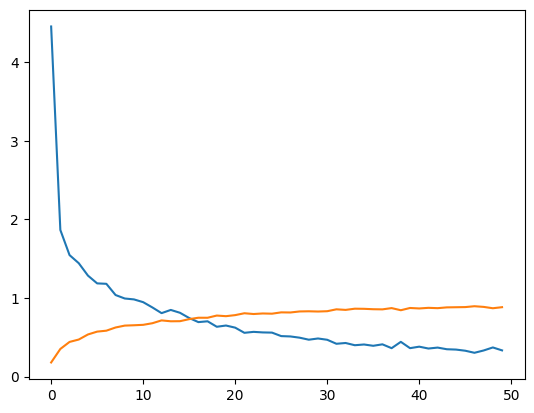

In [ ]:
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['accuracy'], label='accuracy')

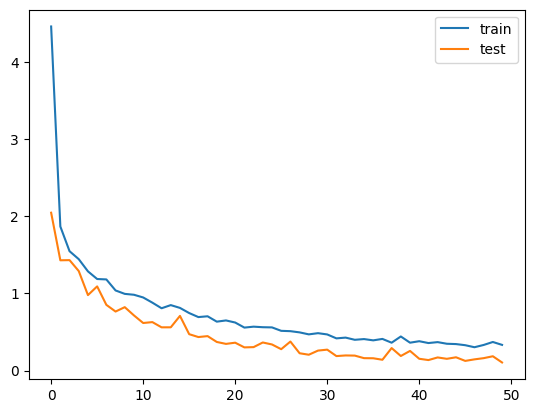

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

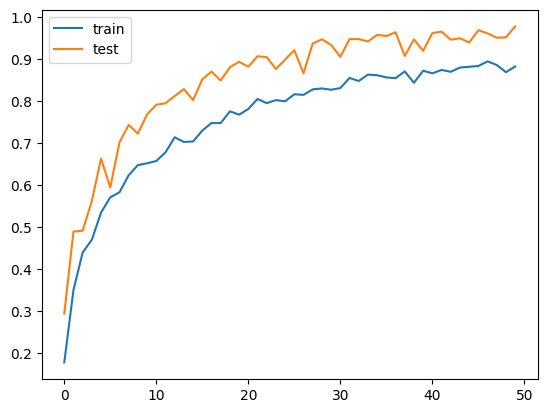

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

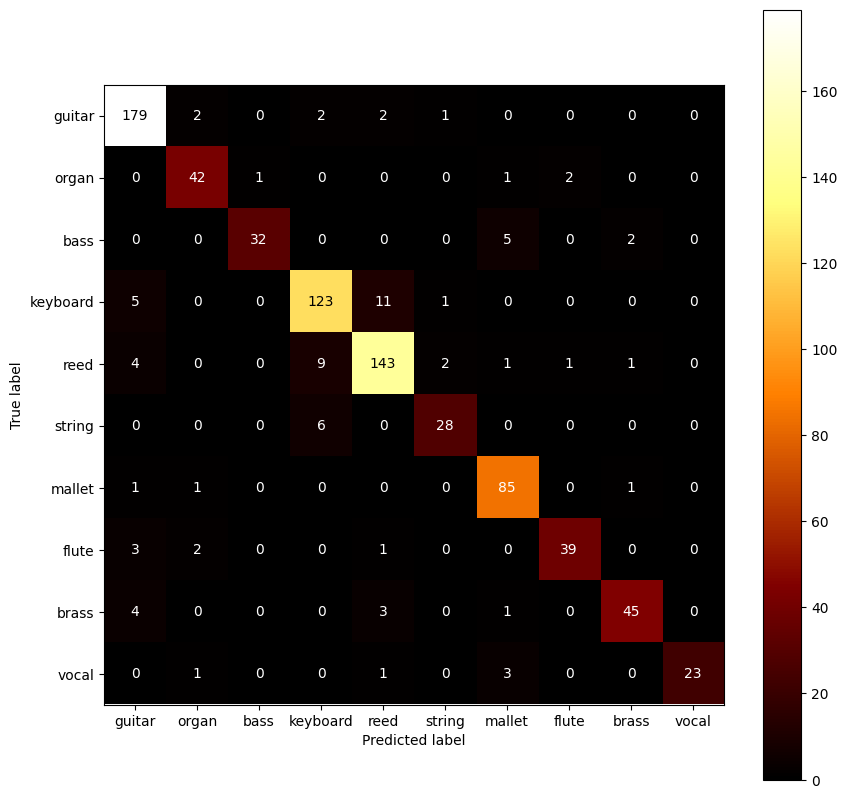

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
confusion_matrix1 = confusion_matrix(y_test, predicted_classes)

ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.show()

In [ ]:
f1_score(y_test, predicted_classes, average='macro')

0.8939712212961235

In [26]:
accuracy_score(y_test, predicted_classes)

0.901219512195122

In [27]:
precision_score(y_test, predicted_classes, average='macro')

0.9132087904331694

In [28]:
recall_score(y_test, predicted_classes, average='macro')

0.8789282421049563

# Grid search CV

In [ ]:
from scikeras.wrappers import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_network(optimizer="rmsprop"):
    print("Creating network")
    model = models.Sequential([
        # Input layer
        Conv2D(filters=32, kernel_size=(3, 3), activation='relu',input_shape = input_shape),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Hidden Conv2D layer
        Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),  # Prevent overfitting
        Dense(10, activation='softmax')  # Output layer for 10 classes
    ])
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
    return model

In [ ]:
network=KerasClassifier(build_fn=create_network,verbose=1)
epochs=[30,50,60]
batches=[10,30,50]
optimizer=["rmsprop","adam"]


param_grid = dict(epochs=epochs,batch_size=batches,optimizer=optimizer)
grid = GridSearchCV(estimator=network, param_grid=param_grid, n_jobs=-1, cv = 3)

gpu = tf.config.list_physical_devices('GPU')
if gpu:
  try:
    with tf.device('/device:GPU:0'):
      print("Training on GPU")
      grid_result = grid.fit(x_train_reshaped, y_train_encoded, validation_split=0.2)
  except RuntimeError as e:
    print(e)
else:
  print("Training on CPU")
  grid_result = grid.fit(x_train_reshaped, y_train_encoded,validation_split=0.2)

Training on GPU


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Creating network
Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.1543 - loss: 23.1134 - val_accuracy: 0.1966 - val_loss: 2.1496
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2271 - loss: 2.4010 - val_accuracy: 0.3354 - val_loss: 1.8436
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3498 - loss: 1.9197 - val_accuracy: 0.4512 - val_loss: 1.5864
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4447 - loss: 1.5913 - val_accuracy: 0.5183 - val_loss: 1.3180
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5510 - loss: 1.2674 - val_accuracy: 0.6387 - val_loss: 0.9812
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6301 - loss: 1.0584 - val_accuracy: 0.6402 - val_loss: 0.9806
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6796 - loss: 0.8818 - val_accuracy: 0.7454 - val_loss: 0.7896
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7561 - loss: 0.7137 - val_ac

In [ ]:
grid_result.best_params_

{'batch_size': 30, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
grid_result.best_estimator_

KerasClassifier(
	model=None
	build_fn=<function create_network at 0x79c0e933f490>
	warm_start=False
	random_state=None
	optimizer=adam
	loss=None
	metrics=None
	batch_size=30
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	class_weight=None
)

In [ ]:
best_params = grid_result.best_params_
best_params

{'batch_size': 30, 'epochs': 50, 'optimizer': 'adam'}

In [ ]:
# Mean cross-validated score of the best_estimator
grid_result.best_score_

0.9093406593406593

In [ ]:
print(grid_result.cv_results_)

{'mean_fit_time': array([ 74.91952411,  65.7240351 , 106.28182189, 107.60391076,
       129.17266711, 119.81751823,  55.91821321,  51.31158837,
        74.89811039,  77.88603711,  90.39063009,  94.66148543,
        50.58938742,  52.83343983,  69.67107979,  68.27598818,
        79.71404982,  91.80076408]), 'std_fit_time': array([ 8.28136387,  3.62162555,  6.08440255,  3.3297949 ,  2.82134786,
        3.55199341,  6.38301252,  1.31053497,  4.3294685 ,  3.02104607,
        5.26155158,  4.78720879,  5.9892662 ,  7.04165987,  3.19900271,
        3.9578974 ,  2.22222762, 17.16889459]), 'mean_score_time': array([2.25214386, 1.94893169, 2.1219542 , 1.34861668, 2.28072007,
       1.3126053 , 1.80706374, 2.12540142, 0.79666416, 1.6276176 ,
       1.37497179, 1.57996662, 1.62038096, 1.63671875, 1.30286638,
       1.58977811, 1.59681575, 2.591453  ]), 'std_score_time': array([0.82443394, 0.61345969, 0.68175671, 0.22678621, 0.84527232,
       0.29835356, 0.73727045, 0.85662342, 0.11053634, 0.125836

In [ ]:
best_grid_model = grid_result.best_estimator_.model_
best_grid_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 92, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 17920)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,775,702 (18.22 MB)

 Trainable params: 2,387,850 (9.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,387,852 (9.11 MB)

In [ ]:
predictions  = best_grid_model.predict(x_test_reshaped)

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step


In [ ]:
loss, accuracy = best_grid_model.evaluate(x_test_reshaped, y_test_encoded)

print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9254 - loss: 0.7517
Test Loss: 0.6770214438438416
Test Accuracy: 0.9256097674369812


In [ ]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes

array([4, 1, 3, 6, 0, 1, 0, 8, 6, 3, 4, 6, 3, 6, 9, 2, 7, 0, 0, 0, 6, 1,
       6, 4, 6, 0, 8, 6, 0, 8, 6, 6, 3, 5, 9, 4, 7, 4, 4, 1, 0, 4, 7, 0,
       7, 0, 4, 3, 3, 1, 0, 6, 4, 3, 4, 6, 0, 6, 4, 8, 0, 0, 4, 0, 6, 0,
       0, 3, 3, 0, 0, 3, 0, 2, 3, 0, 1, 1, 3, 3, 4, 0, 6, 5, 0, 0, 3, 4,
       0, 0, 6, 0, 3, 8, 0, 0, 8, 4, 3, 2, 4, 6, 4, 5, 4, 3, 1, 4, 8, 0,
       6, 2, 0, 6, 4, 1, 3, 0, 7, 3, 4, 4, 8, 7, 1, 0, 2, 0, 4, 9, 8, 8,
       3, 4, 0, 0, 4, 7, 3, 0, 6, 0, 4, 2, 3, 1, 4, 4, 9, 3, 4, 7, 6, 3,
       3, 4, 3, 0, 4, 0, 3, 2, 4, 3, 0, 0, 8, 4, 6, 5, 4, 4, 3, 2, 8, 3,
       3, 0, 4, 3, 4, 0, 0, 3, 8, 4, 4, 4, 6, 4, 6, 4, 3, 7, 4, 2, 4, 0,
       1, 4, 4, 8, 0, 3, 4, 4, 3, 4, 3, 7, 8, 0, 8, 0, 4, 3, 0, 0, 1, 4,
       0, 3, 0, 6, 4, 4, 4, 3, 0, 3, 0, 3, 6, 3, 3, 0, 3, 7, 6, 0, 4, 3,
       4, 1, 4, 7, 0, 0, 0, 0, 6, 0, 0, 3, 7, 6, 0, 0, 1, 4, 4, 3, 7, 4,
       5, 0, 1, 0, 0, 6, 8, 6, 9, 6, 9, 0, 3, 6, 5, 6, 8, 4, 9, 3, 9, 3,
       0, 4, 6, 3, 0, 4, 0, 2, 0, 0, 3, 0, 4, 3, 4,

In [ ]:
best_grid_model.save("/content/f1_91_grid_model.keras")

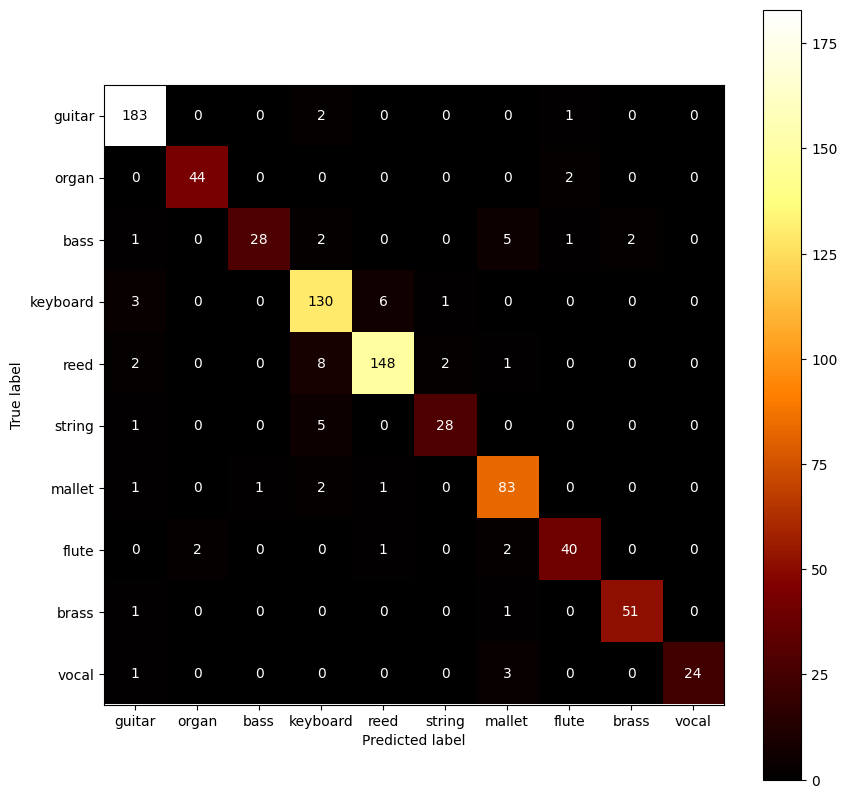

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
confusion_matrix1 = confusion_matrix(y_test, predicted_classes)

ConfusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix1, display_labels=class_list)
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.plot(ax=ax, cmap="afmhot")
plt.show()

In [ ]:
f1_score(y_test, predicted_classes, average='macro')

0.9132018046984607

In [33]:
accuracy_score(y_test, predicted_classes)

0.925609756097561

In [34]:
precision_score(y_test, predicted_classes, average='macro')

0.9339691756213847

In [35]:
recall_score(y_test, predicted_classes, average='macro')

0.8981174638699276